In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 140)
pd.set_option("display.max_columns", None)


# Table Of Contents

#### [1. Introduction](#Introduction)
   - [1.1 Description](#Description)
   - [1.2 Problems to Solve](#Problems_to_solve)
    
#### [2. Cleaning the Data](#Cleaning_the_data)
   - [2.1 Renaming Columns](#Renaming_columns)
   - [2.2 Deciding on the Target](#Deciding_on_the_target)
       - [2.2.1 Exploratory Visualization](#Exploratory_visualization)
   - [2.3 General Formatting](#General_formatting)
   - [2.4 Removing Columns With Only 1 Unique Value](#Removing_columns_with_only_1_unique_value)
    
#### [3. Feature Preparation](#Feature_preparation)
   - [3.1 Addressing Missing Values](#Addressing_missing_values)



<a id='Introduction'></a>

# Introduction

Data set and data set description retrieved from the UCI Machine Learning Repository can be found [here:](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications)

<a id='Description'></a>

## Description

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping).
MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.


<a id='Problems_to_solve'></a>

## Problems to Solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1. the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2. the end of the first day (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. the end of the second day (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4. the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

In [2]:
data = pd.read_csv('MI.data', index_col=None, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,180,100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.7,0,138,?,?,?,8,16,4,0,0,1,?,?,?,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,120,90,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.38,0.18,?,7.8,3,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,100,180,100,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,132,0.3,0.11,?,10.8,?,3,3,0,0,1,1,1,0,1,0,0,3,2,2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,?,?,120,70,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.9,0,146,0.75,0.37,?,?,?,2,0,0,1,?,?,?,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,100,160,90,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.45,0.22,?,8.3,?,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 124 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    0       int64 
 1    1       object
 2    2       int64 
 3    3       object
 4    4       object
 5    5       object
 6    6       object
 7    7       object
 8    8       object
 9    9       object
 10   10      object
 11   11      object
 12   12      object
 13   13      object
 14   14      object
 15   15      object
 16   16      object
 17   17      object
 18   18      object
 19   19      object
 20   20      object
 21   21      object
 22   22      object
 23   23      object
 24   24      object
 25   25      object
 26   26      object
 27   27      object
 28   28      object
 29   29      object
 30   30      object
 31   31      object
 32   32      object
 33   33      object
 34   34      object
 35   35      object
 36   36      object
 37   37      object
 38   38      object
 39   39      object
 40   40  

<a id='Cleaning_the_data'></a>

# Cleaning the Data

1. rename the columns
2. decide on target for modeling 
3. general formatting 
4. remove columns with only 1 unique value


<a id='Renaming_columns'></a>

## Renaming Columns

In [5]:
renamed = [
     'ID', 'Age', 'Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'heredity_on_CHD', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg',
     'diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg', 'systolic_blood_pressure_by_ICU_in_mmHg', 'diastolic_blood_pressure_by_ICU_in_mmHg', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'serum_potassium_content', 'increase_of_sodium_in_serum',
     'serum_sodium_content', 'serum_AlAT_content', 'serum_AsAT_content', 'serum_CPK_content', 'white_blood_cell_count_in_billions_per_liter', 
     'erythrocyte_sedimentation_rate', 'time_from_beginning_of_attack_of_CHD_to_hospital', 'relapse_of_pain_in_first_hours_of_hospital_period', 'relapse_of_pain_in_second_day_of_hospital_period', 'relapse_of_pain_in_third_day_of_hospital_period',
     'use_of_opioid_drugs_by_emergency_cardiology_team', 'use_of_NSAIDs_by_emergency_cardiology_team', 'use_of_lidocaine_by_emergency_cardiology_team', 'use_of_liquid_nitrates_in_ICU', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
     'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU', 'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
     'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 'myocardial_rupture', 'dressler_syndrome', 
     'chronic_heart_failure', 'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome'
]

In [6]:
new_col_names_dict = {}
for i, j in zip(data.columns, renamed):
    new_col_names_dict[i] = j


In [7]:
# new_col_names_dict

In [8]:
data = data.rename(columns = new_col_names_dict)

In [9]:
data

,ID,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,heredity_on_CHD,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,serum_CPK_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU

<a id='Deciding_on_the_target'></a>

## Deciding on the Target

Ultimately, we want to determine the likelihood of complications and outcomes for a given patient.

Columns 113 to 123 provide true or false responses for whether a given complication exists for that patient.
column 124, lethal outcome, provides 7 causes of death (and one additional category for survival). This gives us 11 complications, 7 causes of death, and 1 scenario in which the patient survives. 

Because there are 19 potential targets, we have a few options. We can:
1. predict survival vs. any cause of death, running 1 model to do so
2. predict the likelihood of any complication, running one model to do so
3. predict each specific cause of death as its own target, running 7 models to do so
4. predict each specific complication as its own target, running 11 models to do so

Options 1 and 3 deal exclusively with survival and causes of death, while options 2 and 4 deal with complications. The thrust of the obtainers of this data seems to be to use patient information to better predict complications, not just whether the patient will die. So, while interesting and potentially useful in another setting, let's eliminate options 1 and 3 for the scope of this project. 

Let's focus on number 2: predicting the likelihood of a patient experiencing any complication. This will be more broadly focused than the specific complications option, but it will likely turn up useful information nonetheless that could help guide a physician to certain care strategies over others. Additionally, we would likely need more data available to analyze the problem with the level of granularity contained in option 4. Because the most benefit will be gained by combining patient information with the prediction of any complication in their future, this will be our target for this project.  

To do this, we'll group all possible complications together as a new column in the dataframe. The training set patients will get a score based on how many complications the patient experiences, and the test set will look to accurately predict those scores. 

In [10]:
target_columns = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina' 
    ]

In [11]:
data['target'] = 0

In [12]:
new_targets = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina', 'target'
    ]

data[new_targets].head()

,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,target
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
data['target'] = data[target_columns].sum(axis=1)

In [14]:
data['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

<a id='Exploratory_visualization'></a>

### Exploratory Visualization 

In [15]:
data['Sex'].value_counts()

1    1065
0     635
Name: Sex, dtype: int64

In [16]:
data['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

In [17]:
# finding number of males per number of complications
complication_num_by_sex = data[['Sex', 'target']].groupby('target').sum()
complication_num_by_sex.rename(columns={'Sex': 'males'}, inplace=True)


# complication_num_by_sex['males'] = data['target'].value_counts().values - complication_num_by_sex['Sex'] 
complication_num_by_sex['females'] = data['target'].value_counts().values - complication_num_by_sex['males']

complication_num_by_sex['male_percent'] = complication_num_by_sex['males'] / (complication_num_by_sex['males'] + complication_num_by_sex['females'])
complication_num_by_sex['female_percent'] = complication_num_by_sex['females'] / (complication_num_by_sex['males'] + complication_num_by_sex['females'])

total_males_and_females = data['Sex'].value_counts()
original_male_to_female_ratio = total_males_and_females.values[0] / total_males_and_females.values[1]
original_male_to_female_ratio

complication_num_by_sex['distance_from_original_distribution'] = abs(original_male_to_female_ratio - (complication_num_by_sex['male_percent'] / complication_num_by_sex['female_percent']))
complication_num_by_sex


,males,females,male_percent,female_percent,distance_from_original_distribution
target,,,,,
0,524,241,0.684967,0.315033,0.497109
1,385,254,0.602504,0.397496,0.161417
2,109,92,0.542289,0.457711,0.492383
3,36,38,0.486486,0.513514,0.729797
4,10,9,0.526316,0.473684,0.566054
5,1,1,0.500000,0.500000,0.677165


In [18]:
sex_pivot = pd.pivot_table(data, 'Sex', 'target')
sex_pivot

,Sex
target,
0,0.684967
1,0.602504
2,0.542289
3,0.486486
4,0.526316
5,0.500000


<ipython-input-19-d8771c51972e>:22: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts, autotexts = ax1.pie(


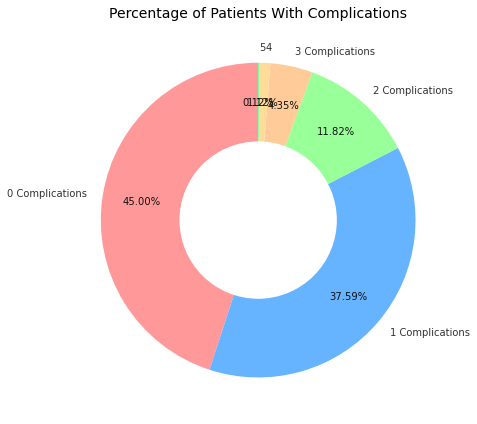

In [19]:
# step 3

complication_series = data['target'].value_counts(normalize=True)
labels = complication_series.index

new_labels = []
for label in labels:
    if label <= 3:
        new_labels.append('{} {}'.format(label, 'Complications'))
    else:
        new_labels.append(label)

sizes = complication_series.values

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffdd99', '#66ff99']


# gender_series = data[]


fig1, ax1 = plt.subplots(figsize=(10, 6))
patches, texts, autotexts = ax1.pie(
    sizes,
    labels=new_labels,
    autopct='%1.2f%%',
    colors=colors,
    pctdistance=0.75,
    startangle=90   
)

for text in texts:
    text.set_color('#333')
    
for autotext in autotexts:
    autotext.set_color('#111')
    

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Percentage of Patients With Complications', fontsize=14)


    
plt.tight_layout()
plt.show()

In [20]:
# # step 2 

# complication_series = data['target'].value_counts(normalize=True)
# labels = complication_series.index

# new_labels = []
# for label in labels:
#     new_labels.append('{} {}'.format(label, 'Complications'))

# sizes = complication_series.values

# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffdd99', '#66ff99']

# fig1, ax1 = plt.subplots(figsize=(10, 6))
# ax1.pie(
#     sizes,
#     labels=new_labels,
#     autopct='%1.2f%%',
#     colors=colors,
#     startangle=90   
# )
# plt.tight_layout()
# plt.show()

<ipython-input-21-d02025bf103f>:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(


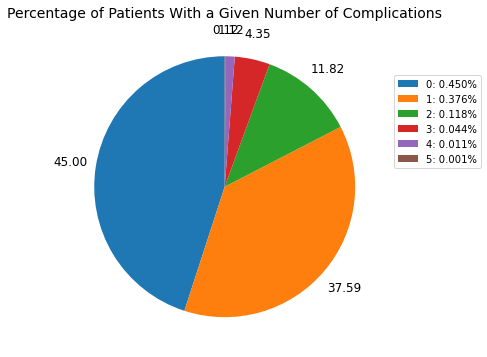

In [21]:
complication_series = data['target'].value_counts(normalize=True)
labels = complication_series.index
values = complication_series.values


ax, figure = plt.subplots(figsize=(10, 6))


plt.pie(
        values, 
        autopct='%.2f', 
        textprops={'fontsize': 12},
        pctdistance=1.2, 
        startangle=90
       )

labelled = [f'{l}: {v:0.3f}%' for l, v in zip(labels, values)]
plt.title('Percentage of Patients With a Given Number of Complications', fontsize=14)
plt.legend(
        labels = labelled, 
        loc='right', 
        bbox_to_anchor=(1.3, 0.7)
    )

plt.show()

# only show the legible values next to the slice

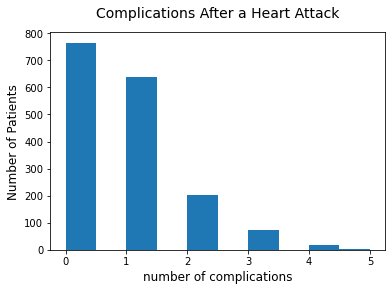

In [22]:
data['target'].plot.hist()
plt.title('Complications After a Heart Attack', y=1.04, fontsize=14)
plt.xticks(size=10)
plt.xlabel('number of complications', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()


We see that people had anywhere from 0 to 5 unique complications following their heart attack. With this information, we've defined our goal more clearly: to predict what type, and how many complications someone is likely to have.
We'll create a model to do this. 

<a id='General_formatting'></a>

## General Formatting

In [23]:
data.isnull().sum()

ID                                                                 0
Age                                                                0
Sex                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
heredity_on_CHD                                                    0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions

In [24]:
# data['exertional_angina_pectoris_in_anam'].value_counts()

In [25]:
for col_name in data.columns:
    data[col_name] = data[col_name].replace('?', np.nan)

In [26]:
# data['exertional_angina_pectoris_in_anam'].value_counts(dropna=False)

In [27]:
data.isnull().sum()

ID                                                                    0
Age                                                                   8
Sex                                                                   0
num_MI_in_anam                                                        4
exertional_angina_pectoris_in_anam                                  106
functional_class_of_angina_pectoris_in_last_year                     73
CHD_in_recent_weeks                                                  51
heredity_on_CHD                                                    1628
essential_hypertension                                                9
symptomatic_hypertension                                              8
duration_of_arterial_hypertension                                   248
chronic_heart_failure_in_anam                                        54
arrhythmia_in_anam                                                   21
premature_atrial_contractions_in_anam                           

<a id='Removing_columns_with_only_1_unique_value'></a>

## Removing Columns With Only 1 Unique Value

It's good practice to disregard any columns tht only have one unique value, as those would not help us in the modeling process. We can verify easily with this relatively small number of features that there are no columns that fall in this category. Furthermore, none of the columns that have only two unique values have one of those values as NaN. We're good to move forward, knowing at this stage that these columns are all potentially useful.

In [28]:
data.nunique(dropna=False)

ID                                                                 1700
Age                                                                  63
Sex                                                                   2
num_MI_in_anam                                                        5
exertional_angina_pectoris_in_anam                                    8
functional_class_of_angina_pectoris_in_last_year                      6
CHD_in_recent_weeks                                                   4
heredity_on_CHD                                                       3
essential_hypertension                                                5
symptomatic_hypertension                                              3
duration_of_arterial_hypertension                                     9
chronic_heart_failure_in_anam                                         6
arrhythmia_in_anam                                                    3
premature_atrial_contractions_in_anam                           

<a id='Feature_preparation'></a>

# Feature Preparation 

1. address missing values 
2. convert categorical to numeric
3. remove any other extraneous columns

<a id='Addressing_missing_values'></a>

## Addressing Missing Values
We'll use two main techniques to address missing values:
   - imputation (using the mean or median)
   - removal of rows or columns
    
We should go column by column to assess how to deal with missing values. We can look at the following parameters to help guide our decisions:
1. how many unique values are there in a column?
2. what percentage of each of the total is each unique value? (the more lopsided, generally the less useful)
3. is the column useful for a machine learning model? If not, removal is a good choice. If so, removal of rows provided not too many, may be the way to go. 


    

In [29]:
removable_cols = ['ID']

To proceed broadly at first, let's start with an assumption that if a column has at least 55% of the values not missing, we'll keep those columns. Later, we'll address the remaining columns' missing rows.

In [30]:
missing_maximum = int(len(data) * 0.45)
missing_maximum

765

In [31]:
missings = data.isnull().sum()
# missings < missing_maximum

df_55_plus = data[missings[missings.values < missing_maximum].index]

df_55_plus.isnull().sum()


ID                                                                   0
Age                                                                  8
Sex                                                                  0
num_MI_in_anam                                                       4
exertional_angina_pectoris_in_anam                                 106
functional_class_of_angina_pectoris_in_last_year                    73
CHD_in_recent_weeks                                                 51
essential_hypertension                                               9
symptomatic_hypertension                                             8
duration_of_arterial_hypertension                                  248
chronic_heart_failure_in_anam                                       54
arrhythmia_in_anam                                                  21
premature_atrial_contractions_in_anam                               21
premature_ventricular_contractions_in_anam                          21
paroxy

In [32]:
print(df_55_plus.shape)
print(data.shape)

(1700, 121)
(1700, 125)


In [33]:
df_55_plus = df_55_plus.drop('ID', axis=1)

In [34]:
df_55_plus.head()

,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricula

We've removed 5 columns so far. 

In [35]:
df_55_plus['duration_of_arterial_hypertension'].unique()

array(['7', '0', '2', '3', '6', '1', '5', nan, '4'], dtype=object)

let's look at the columns with the largest number of missing values next.

In [36]:
data['use_of_opioid_drugs_by_emergency_cardiology_team'].value_counts(dropna=False)

NaN    657
1      618
0      425
Name: use_of_opioid_drugs_by_emergency_cardiology_team, dtype: int64

In [37]:
test_df = pd.DataFrame(
    data=[
            [1, 0, 5, 0], 
            [2, 0, 5, 0],
            [3, 0, 5, 0]
        ],
    columns=['first', 'second', 'third', 'fourth']
)
test_df

,first,second,third,fourth
0,1,0,5,0
1,2,0,5,0
2,3,0,5,0


In [38]:
# df['A'] = df.apply(lambda x: x['B'] if x['A']==0 else x['A'], axis=1)

In [39]:
ts = ['first', 'second', 'third']        
# test_df['second'] = test_df.apply(lambda x: x['first'] if x['first'] == 1 else x['second'], axis=1)
test_df['fourth'] = test_df[ts].sum(axis=1)

In [40]:
test_df

,first,second,third,fourth
0,1,0,5,6
1,2,0,5,7
2,3,0,5,8
